# AULA 01

In [ ]:
!pip install -q --upgrade langchain langchain-google-genai google-generativeai

# Instalação das bibliotecas para usar a API do Google Gemini com o LangChain.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI
import os

# --- Configuração da Chave de API do Google Gemini ---
# Para usar o modelo Gemini, você precisa de uma chave de API do Google AI Studio.
# Obtenha sua chave aqui: https://aistudio.google.com/app/apikey

# É ALTAMENTE RECOMENDADO USAR O GOOGLE COLAB SECRETS (icone da chave 🔑 ao lado esquerdo)
# EM VEZ DE COLOCAR A CHAVE DIRETAMENTE NO CÓDIGO, PRINCIPALMENTE EM AMBIENTES DE PRODUÇÃO!
# Se usar os Secrets, nomeie a chave como 'GEMINI_API_KEY'.

# Opção 1: Carregar a chave dos Google Colab Secrets (RECOMENDADO)
# Esta opção tenta carregar a chave 'GEMINI_API_KEY' dos secrets.
try:
    GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')
    if not GOOGLE_API_KEY:
        # Se a chave não for encontrada nos secrets, levanta um erro para tentar a próxima opção.
        raise ValueError("GEMINI_API_KEY não encontrada nos secrets do Colab.")
    print("API Key carregada dos secrets do Colab.")
except ValueError as e:
    print(f"Não foi possível carregar API Key dos secrets: {e}")
    # Opção 2: Inserir a chave diretamente no código (NÃO RECOMENDADO PARA PRODUÇÃO!)
    # Use esta opção APENAS para testes rápidos ou demonstrações onde a segurança não é crítica.
    # SUBSTITUA 'SUA_CHAVE_AQUI' PELA SUA CHAVE REAL DO GOOGLE AI STUDIO.
    # Em um notebook para compartilhar, você pode deixar 'SUA_CHAVE_AQUI' como um placeholder
    # e instruir o usuário a substituí-la ou usar a Opção 1.
    GOOGLE_API_KEY = os.getenv('GEMINI_API_KEY', 'SUA_CHAVE_AQUI') # <-- SUBSTITUA 'SUA_CHAVE_AQUI' aqui!
    if GOOGLE_API_KEY == 'SUA_CHAVE_AQUI':
         print("AVISO: Usando chave de API placeholder 'SUA_CHAVE_AQUI'. Por favor, substitua pela sua chave real ou use os secrets do Colab.")
    else:
         print("API Key carregada de variável de ambiente (útil em alguns setups) ou valor padrão.")


# Verificação final da chave
if not GOOGLE_API_KEY or GOOGLE_API_KEY == 'SUA_CHAVE_AQUI':
    print("\n--- ERRO DE CONFIGURAÇÃO ---")
    print("Por favor, configure sua chave de API do Google Gemini.")
    print("Use os Google Colab Secrets (recomendado) ou substitua 'SUA_CHAVE_AQUI' na Opção 2.")
    print("----------------------------\n")
else:
    print("Chave de API do Google Gemini configurada com sucesso.")

# Conexão com o Gemini.
# Esta parte do código usa a chave configurada acima.

In [ ]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0.0,
    api_key=GOOGLE_API_KEY
)

# Criação de uma instância do modelo Gemini 2.5 Flash, configurado para respostas precisas.

In [ ]:
resp_test = llm.invoke("Quantos dias de férias eu tenho na minha empresa?")

print(resp_test.content)

# Obtém a resposta do LLM sobre dias de férias e imprime o conteúdo.

Eu não tenho acesso às informações específicas da sua empresa ou do seu contrato de trabalho, então não consigo te dar um número exato.

No entanto, posso te explicar como você pode descobrir e quais são as regras gerais no Brasil (pela CLT) e em Portugal, que são os países onde o português é a língua oficial mais comum para essa pergunta:

---

### **Como descobrir quantos dias de férias você tem:**

A melhor forma de saber é consultando as seguintes fontes:

1.  **Departamento de Recursos Humanos (RH) ou Pessoal da sua empresa:** Eles têm todas as suas informações contratuais e o controle do seu período aquisitivo.
2.  **Seu contrato de trabalho:** Geralmente, as condições de férias são mencionadas.
3.  **Política interna da empresa:** Algumas empresas podem ter políticas específicas que complementam a legislação.
4.  **Seu gestor/chefe direto:** Ele pode te orientar sobre como obter essa informação.

---

### **Regras Gerais (Brasil - CLT):**

No Brasil, a Consolidação das Leis do T

In [ ]:
TRIAGEM_PROMPT = (
    "Você é um triador de Service Desk para políticas internas da empresa Carraro Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "\n"
    "    'decisao': 'AUTO_RESOLVER' | 'PEDIR_INFO' | 'ABRIR_CHAMADO',\n"
    "    'urgencia': 'BAIXA' | 'MEDIA' | 'ALTA',\n"
    "    'campos_faltantes': ['....']\n"
    "\n"
    "Regras:\n"
    "- 'AUTO_RESOLVER': Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: 'Posso reembolsar a internet do meu home office?')\n"
    "- 'PEDIR_INFO': Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: 'Preciso de ajuda com uma política')\n"
    "- 'ABRIR_CHAMADO': Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado\n"
    "Analise a mensagem e decida a ação mais apropriada."

    """
    decisao: AUTO_RESOLVER
    urgencia: BAIXA
    campos_faltantes: []
    """
)

# Prompt de triagem configurado para classificar solicitações conforme as regras da empresa.

In [ ]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
    decisao: Literal['AUTO_RESOLVER', 'PEDIR_INFO', 'ABRIR_CHAMADO']
    urgencia: Literal[ 'BAIXA', 'MEDIA', 'ALTA']
    campos_faltantes: List[str] = Field(default_factory=list)

# Modelo Pydantic para validar a saída da triagem.

In [ ]:
llm_triagem = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash",
    temperature = 0.0,
    api_key=GOOGLE_API_KEY
)

# Instancia o LLM para triagem usando o modelo Gemini com temperatura zero.

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem(mensagem: str) -> Dict:
  saida: TriagemOut = triagem_chain.invoke([
      SystemMessage(content=TRIAGEM_PROMPT),
      HumanMessage(content=mensagem)
  ])

  return saida.model_dump()

# Função que envia a mensagem ao LLM e retorna o resultado validado como dicionário.

In [ ]:
testes = ["Posso reembolsar a Internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]

# Lista de mensagens de teste para validar a triagem do modelo.

In [ ]:
for msg_teste in testes:
    print(f"Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n")

# Executa a função de triagem para cada mensagem de teste e imprime os resultados.

Pergunta: Posso reembolsar a Internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto. Como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Posso reembolsar cursos ou treinamentos da Alura?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Rio Pinheiros?
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': ['informação sobre políticas internas da empresa']}



# AULA 02

In [ ]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

# Instala e atualiza as bibliotecas necessárias para processamento de texto e busca semântica.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
!pip install PyPDF2

# Instala a biblioteca PyPDF2 para manipulação de arquivos PDF.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
import PyPDF2

# 1. Montar o Google Drive.
drive.mount('/content/drive')

# 2. Caminho da pasta Alura no seu Google Drive.
drive_path = '/content/drive/MyDrive/Alura'

# 3. Verificar se a pasta existe e listar os PDFs.
if not os.path.exists(drive_path):
    raise FileNotFoundError(f"Pasta não encontrada: {drive_path}")

arquivos = os.listdir(drive_path)
pdfs = [f for f in arquivos if f.lower().endswith('.pdf')]

if not pdfs:
    raise FileNotFoundError("Nenhum arquivo PDF encontrado na pasta Alura.")

print("PDFs encontrados:")
for pdf in pdfs:
    print(" -", pdf)

# 4. Ler todos os PDFs e salvar o texto em um único arquivo.
texto_completo = ""

for pdf in pdfs:
    pdf_path = os.path.join(drive_path, pdf)
    print(f"\n📄 Lendo: {pdf}")
    with open(pdf_path, 'rb') as f:
        reader = PyPDF2.PdfReader(f)
        for i, page in enumerate(reader.pages):
            texto_pagina = page.extract_text()
            texto_completo += f"\n\n--- {pdf} | Página {i+1} ---\n"
            texto_completo += texto_pagina if texto_pagina else "[Sem texto detectável]"

# 5. Salvar o texto em um arquivo .txt no Colab.
saida_txt = '/content/texto_politicas.txt'
with open(saida_txt, 'w', encoding='utf-8') as f:
    f.write(texto_completo)

print(f"\n✅ Texto salvo em: {saida_txt}")

# Código monta o Google Drive, lista PDFs na pasta 'Alura', extrai o texto de todos e salva em um .txt.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PDFs encontrados:
 - Política de Reembolsos (Viagens e Despesas).pdf
 - Políticas de Home Office.pdf
 - Política de Uso de E-mail e Segurança da Informação.pdf

📄 Lendo: Política de Reembolsos (Viagens e Despesas).pdf

📄 Lendo: Políticas de Home Office.pdf

📄 Lendo: Política de Uso de E-mail e Segurança da Informação.pdf

✅ Texto salvo em: /content/texto_politicas.txt


In [ ]:
# from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader
from google.colab import files
import io

docs = []

# Use o widget de upload do Colab para carregar os arquivos PDF
print("Por favor, faça o upload dos arquivos PDF que deseja usar:")
uploaded = files.upload()

for name, data in uploaded.items():
    print(f'Carregando arquivo "{name}" ({len(data)} bytes)')
    try:
        # Salva o arquivo uploaded temporariamente para que o PyMuPDFLoader possa lê-lo
        with open(name, 'wb') as f:
            f.write(data)
        loader = PyMuPDFLoader(name)
        docs.extend(loader.load())
        print(f"Carregado com sucesso o arquivo {name}")
        # Opcional: remover o arquivo temporário após carregar
        # os.remove(name)
    except Exception as e:
        print(f"Erro ao carregar arquivo {name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

# Código permite o upload de PDFs, carrega o conteúdo usando PyMuPDFLoader e armazena em 'docs'.

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)

# Divide os documentos carregados em pedaços de até 300 caracteres com sobreposição de 30, armazenando em 'chunks'.

In [ ]:
chunks

# Exibirá uma lista dos PDFs carregados.

[Document(metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/drive/MyDrive/Alura/Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': '/content/drive/MyDrive/Alura/Política de Reembolsos (Viagens e Despesas).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Reembolsos (Viagens e Despesas)', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}, page_content='Política de Reembolsos (Viagens e \nDespesas) \n \n1.\u200b Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corridos após a \ndespesa.\u200b\n \n2.\u200b Alimentação em viagem: limite de R$ 70/dia por pessoa. Bebidas alcoólicas não \nsão reembolsáveis.\u200b'),
 Document(metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/drive/MyDrive/Alura/Política de Reembolsos (Viagens e Despesas).

In [ ]:
for chunk in chunks:
  print(chunk)
  print("-------------------------------")

# Imprime cada chunk dos documentos com uma linha separadora entre eles.

page_content='Política de Reembolsos (Viagens e 
Despesas) 
 
1.​ Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corridos após a 
despesa.​
 
2.​ Alimentação em viagem: limite de R$ 70/dia por pessoa. Bebidas alcoólicas não 
são reembolsáveis.​' metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/drive/MyDrive/Alura/Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': '/content/drive/MyDrive/Alura/Política de Reembolsos (Viagens e Despesas).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Reembolsos (Viagens e Despesas)', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
-------------------------------
page_content='são reembolsáveis.​
 
3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. 
Comprovantes obrigatórios.​
 
4.​ Internet para home office: reembolsável via subsí

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model = "models/gemini-embedding-001",
    google_api_key = GOOGLE_API_KEY
)

# Cria embeddings para os textos usando o modelo 'gemini-embedding-001' da Google Generative AI.

In [ ]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)

retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                    search_kwargs={"score_threshold": 0.3, "k": 4})

# Cria um vetor de busca FAISS a partir dos chunks com embeddings e configura um retriever para buscar os 4 documentos mais similares com pontuação mínima de 0.3.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
      "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento."
      "Responda SOMENTE com base no contexto fornecido."
      "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {pergunta}\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

# Cria um prompt de RAG (Recuperação + Geração) para o LLM responder apenas com base nos documentos fornecidos, usando 'document_chain'.

In [ ]:
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

# Funções para limpar texto, extrair trechos próximos a termos da query e formatar citações únicas dos documentos (máx. 3 por query).

In [ ]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
  docs_relacionados = retriever.invoke(pergunta)

  if not docs_relacionados:
    return {"answer": "Não sei.",
            "citacoes": [],
            "contexto_encontrado": False}

  answer = document_chain.invoke({"pergunta": pergunta,
                                 "context": docs_relacionados})

  txt = (answer or "").strip()

  if txt.rstrip(".!?") == "Não sei.":
    return {"answer": "Não sei.",
            "citacoes": [],
            "contexto_encontrado": False}

  # Format citations using the formatar_citacoes function.
  formatted_citations = formatar_citacoes(docs_relacionados, pergunta)

  return {"answer": txt,
          "citacoes": formatted_citations,
          "contexto_encontrado": True}

  # Função que realiza uma pergunta ao sistema RAG de políticas internas, retorna a resposta, citações e indica se contexto foi encontrado.

In [ ]:
testes = ["Posso reembolsar a Internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]

# Lista de perguntas de teste para verificar respostas do sistema RAG de políticas internas.

In [ ]:
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print("CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

# Loop para testar cada pergunta, imprimir a resposta e, se houver contexto, listar as citações relacionadas.

PERGUNTA: Posso reembolsar a Internet?
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal, conforme a política de Home Office.
CITAÇÕES:
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R$ 100/mês, mediante nota fiscal nominal.​ 6.​ Solicitação de
------------------------------------
PERGUNTA: Quero mais 5 dias de trabalho remoto. Como faço?
RESPOSTA: Para solicitar mais 5 dias de trabalho remoto, você deve formalizar a solicitação via chamado ao RH com a justificativa do seu gestor.
CITAÇÕES

# AULA 03

In [ ]:
!pip install -q --upgrade langgraph

# Instala ou atualiza silenciosamente a biblioteca 'langgraph' no ambiente.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 20.6 MB/s eta 0:00:00


In [ ]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
      pergunta: str
      triagem: dict
      resposta: Optional[str]
      citacoes: List[dict]
      rag_sucessso: bool
      acao_final: str

# Define um TypedDict 'AgentState' para estruturar o estado de um agente, com campos opcionais como pergunta, triagem, resposta, citações e status do RAG.

In [ ]:
def node_triagem(state: AgentState) -> AgentState:
    print("Executando nó de triagem...")
    return {"triagem": triagem(state["pergunta"])}

# Função que executa o nó de triagem, chamando a função 'triagem' com a pergunta do estado e retornando o resultado.

In [ ]:
def node_auto_resolver(state: AgentState) -> AgentState:
    print("Executando nó de auto_resolver...")
    resposta_rag = perguntar_politica_RAG(state["pergunta"])

    update: AgentState = {
        "resposta": resposta_rag["answer"],
        "citacoes": resposta_rag.get("citacoes", []),
        "rag_sucesso": resposta_rag["contexto_encontrado"],
    }

    if resposta_rag["contexto_encontrado"]:
        update["acao_final"] = "AUTO_RESOLVER"

    return update

# Função que executa o nó de auto-resolução, usando RAG para responder à pergunta e atualizando o estado com resposta, citações, sucesso e ação final.

In [ ]:
def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de pedir_info...")
    faltantes = state["triagem"].get("campos_faltantes", [])
    if faltantes:
        detalhe = ",".join(faltantes)
    else:
        detalhe = "Tema e contexto específico"

    return {
        "resposta": f"Para avançar, preciso que detalhe: {detalhe}",
        "citacoes": [],
        "acao_final": "PEDIR_INFO"
    }

# Função que executa o nó de pedir informações, retornando quais campos faltam detalhar para prosseguir.

In [ ]:
def node_abrir_chamado(state: AgentState) -> AgentState:
    print("Executando nó de abrir_chamado...")
    triagem = state["triagem"]

    return {
        "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}",
        "citacoes": [],
        "acao_final": "ABRIR_CHAMADO"
    }

# Função que executa o nó de abrir chamado, criando uma resposta resumida com urgência e trecho da pergunta, e define a ação final.

In [ ]:
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

def decidir_pos_triagem(state: AgentState) -> str:
    print("Decidindo após a triagem...")
    decisao = state["triagem"]["decisao"]

    if decisao == "AUTO_RESOLVER": return "auto"
    if decisao == "PEDIR_INFO": return "info"
    if decisao == "ABRIR_CHAMADO": return "chamado"

# Função que decide qual caminho seguir após a triagem com base na decisão indicada no estado: auto-resolver, pedir info ou abrir chamado.

In [ ]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print("Decidindo após o auto_resolver...")

    if state.get("rag_sucesso"):
        print("Rag com sucesso, finalizando o fluxo.")
        return "ok"

    state_da_pergunta = (state["pergunta"] or "").lower()

    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        print("Rag falhou, mas foram encontradas keywords de abertura de ticket. Abrindo...")
        return "chamado"

    print("Rag falhou, sem keywords, vou pedir mais informações...")
    return "info"

# Função que decide o próximo passo após auto_resolver: se RAG teve sucesso, finaliza; se houver keywords de ticket, abre chamado; caso contrário, pede mais informações.

In [ ]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto": "auto_resolver",
    "info": "pedir_info",
    "chamado": "abrir_chamado"
})

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "info": "pedir_info",
    "chamado": "abrir_chamado",
    "ok": END
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()

# Cria e compila o fluxo de trabalho com o StateGraph: define nós, decisões condicionais e ligações entre triagem, auto_resolver, pedir_info e abrir_chamado.

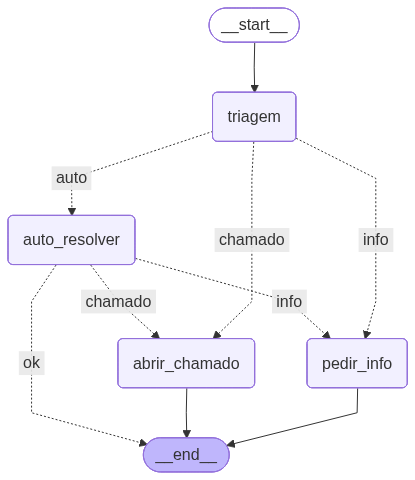

In [ ]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

# Gera e exibe uma imagem do fluxo de trabalho em formato Mermaid usando o Jupyter/Colab.

In [ ]:
testes = ["Posso reembolsar a Internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "É possível reembolsar certificações do Google Cloud?",
          "Posso obter o google Gemini de graça?",
          "Qual é a palavra-chave da aula de hoje?",
          "Quantas capivaras tem no Rio Pinheiros?"]

# Lista atualizada de perguntas de teste para verificar o comportamento do workflow de políticas internas.

In [ ]:
for msg_test in testes:
    resposta_final = grafo.invoke({"pergunta": msg_test})

    triag = resposta_final.get("triagem", {})
    print(f"PERGUNTA: {msg_test}")
    print(f"DECISÃO: {triag.get('decisao')} | URGÊNCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")
    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")

# Loop para executar cada pergunta no workflow, mostrando decisão da triagem, urgência, ação final, resposta e citações (se houver).

Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag falhou, sem keywords, vou pedir mais informações...
Executando nó de pedir_info...
PERGUNTA: Posso reembolsar a Internet?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO
RESPOSTA: Para avançar, preciso que detalhe: Tema e contexto específico
------------------------------------
Executando nó de triagem...
Decidindo após a triagem...
Executando nó de abrir_chamado...
PERGUNTA: Quero mais 5 dias de trabalho remoto. Como faço?
DECISÃO: ABRIR_CHAMADO | URGÊNCIA: MEDIA | AÇÃO FINAL: ABRIR_CHAMADO
RESPOSTA: Abrindo chamado com urgência MEDIA. Descrição: Quero mais 5 dias de trabalho remoto. Como faço?
------------------------------------
Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag falhou, sem keywords, vou pedir mais informações...
Executando nó de pedir_info...
PER

  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 57
}
].


Decidindo após o auto_resolver...
Rag falhou, sem keywords, vou pedir mais informações...
Executando nó de pedir_info...
PERGUNTA: É possível reembolsar certificações do Google Cloud?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO
RESPOSTA: Para avançar, preciso que detalhe: Tema e contexto específico
------------------------------------
Executando nó de triagem...


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 10
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 55
}
]